In [1]:
import pandas as pd
import shap
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt

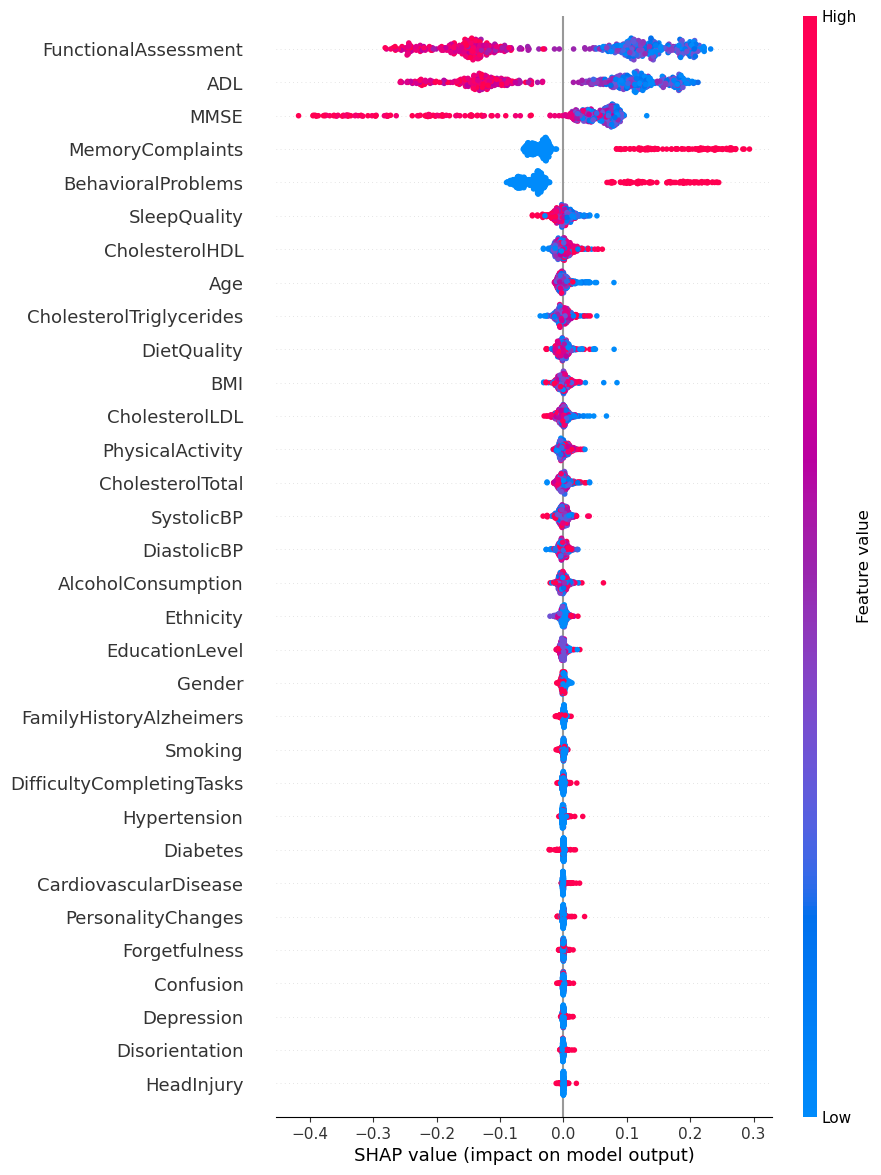

In [3]:
shap.initjs()

#import data
df_raw = pd.read_csv("alzheimers_disease_data_oversampled.csv")

#remove PatientID and DoctorInCharge cols so they don't get used in RF
df_raw.drop(["PatientID","DoctorInCharge"], axis=1, inplace=True)

#create X and y variables
df_train = df_raw.drop(["Diagnosis"],axis=1)
df_test = df_raw["Diagnosis"]

#Normalize data
scaler = MaxAbsScaler()
train_scaler = scaler.fit_transform(df_train)
df_norm = pd.DataFrame(train_scaler)
df_norm.columns = df_train.columns

#Create train/test split
x_train, x_test, y_train, y_test = train_test_split(df_norm, df_test, 
                                                    test_size=0.2, random_state=42)
#create rf classifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)

#create SHAP values
explainer = shap.Explainer(clf, x_test)
shap_values = explainer(x_test)

#plot SHAP
shap.plots.beeswarm(shap_values[:, :, 1], max_display=33)
